#📌 Extracão

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [4]:
df = pd.read_json(url)

In [5]:
print("Dimensão do dataset:", df.shape)
print("\nColunas disponíveis:", df.columns.tolist())

Dimensão do dataset: (7267, 6)

Colunas disponíveis: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


#🔧 Transformação

In [6]:
df_transformed = df.copy()

In [7]:
customer_df = pd.json_normalize(df_transformed['customer'])
phone_df = pd.json_normalize(df_transformed['phone'])
internet_df = pd.json_normalize(df_transformed['internet'])
account_df = pd.json_normalize(df_transformed['account'])

In [8]:
df_final = pd.concat(
    [df_transformed[['customerID', 'Churn']],  # mantém apenas o ID e a variável alvo
     customer_df, phone_df, internet_df, account_df],
    axis=1
)

In [9]:
print("Dimensão do dataset transformado:", df_final.shape)
print("\nColunas disponíveis:", df_final.columns.tolist())
df_final.head()

Dimensão do dataset transformado: (7267, 21)

Colunas disponíveis: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
print("Valores nulos por coluna:")
print(df_final.isnull().sum())
print("\n")

Valores nulos por coluna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64




In [11]:
print("Quantidade de linhas duplicadas:", df_final.duplicated().sum())
print("\n")

Quantidade de linhas duplicadas: 0




In [12]:
print("Tipos de dados das colunas:")
print(df_final.dtypes)
print("\n")

Tipos de dados das colunas:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object




In [13]:
print("Estatísticas descritivas das colunas numéricas:")
print(df_final.describe())

Estatísticas descritivas das colunas numéricas:
       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000


In [14]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
print(df_final['Charges.Total'].isnull().sum())

11


In [15]:
df_final.dropna(subset=['Charges.Total'], inplace=True)
print("Novas dimensões:", df_final.shape)

Novas dimensões: (7256, 21)


In [16]:
df_final['Contas_Diarias'] = df_final['Charges.Monthly'] / 30
df_final[['customerID', 'Charges.Monthly', 'Contas_Diarias']].head()

,customerID,Charges.Monthly,Contas_Diarias
0,0002-ORFBO,65.6,2.186667
1,0003-MKNFE,59.9,1.996667
2,0004-TLHLJ,73.9,2.463333
3,0011-IGKFF,98.0,3.266667
4,0013-EXCHZ,83.9,2.796667


In [17]:
binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'PaperlessBilling']

for col in binarias:
    df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})

In [18]:
df_final.rename(columns={
    'Charges.Monthly': 'Faturamento_Mensal',
    'Charges.Total': 'Faturamento_Total',
    'Contas_Diarias': 'Faturamento_Diario'
}, inplace=True)

In [19]:
df_final['InternetService'] = df_final['InternetService'].map({
    'Fiber optic': 'Fibra Óptica',
    'DSL': 'DSL',
    'No': 'Nenhum'
})

In [20]:
print(df_final.shape)
print(df_final.columns.tolist())
df_final.head()

(7256, 22)
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Faturamento_Mensal', 'Faturamento_Total', 'Faturamento_Diario']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Faturamento_Mensal,Faturamento_Total,Faturamento_Diario
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fibra Óptica,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fibra Óptica,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fibra Óptica,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga e análise

In [21]:
numericas = ['tenure', 'Faturamento_Mensal', 'Faturamento_Total', 'Faturamento_Diario', 'SeniorCitizen']

print("=== MÉTRICAS DAS COLUNAS NUMÉRICAS ===\n")
for col in numericas:
    media = df_final[col].mean()
    mediana = df_final[col].median()
    desvio = df_final[col].std()
    minimo = df_final[col].min()
    maximo = df_final[col].max()
    print(f"{col}:")
    print(f"  Média: {media:.2f}")
    print(f"  Mediana: {mediana:.2f}")
    print(f"  Desvio Padrão: {desvio:.2f}")
    print(f"  Min: {minimo:.2f} | Max: {maximo:.2f}\n")

# Variáveis binárias/categóricas importantes
binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

print("=== CONTAGEM DAS COLUNAS BINÁRIAS/CATEGÓRICAS ===\n")
for col in binarias:
    print(f"{col}:\n{df_final[col].value_counts()}\n")

=== MÉTRICAS DAS COLUNAS NUMÉRICAS ===

tenure:
  Média: 32.40
  Mediana: 29.00
  Desvio Padrão: 24.56
  Min: 1.00 | Max: 72.00

Faturamento_Mensal:
  Média: 64.76
  Mediana: 70.30
  Desvio Padrão: 30.13
  Min: 18.25 | Max: 118.75

Faturamento_Total:
  Média: 2280.63
  Mediana: 1391.00
  Desvio Padrão: 2268.63
  Min: 18.80 | Max: 8684.80

Faturamento_Diario:
  Média: 2.16
  Mediana: 2.34
  Desvio Padrão: 1.00
  Min: 0.61 | Max: 3.96

SeniorCitizen:
  Média: 0.16
  Mediana: 0.00
  Desvio Padrão: 0.37
  Min: 0.00 | Max: 1.00

=== CONTAGEM DAS COLUNAS BINÁRIAS/CATEGÓRICAS ===

Churn:
Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

Partner:
Partner
0    3747
1    3509
Name: count, dtype: int64

Dependents:
Dependents
0    5086
1    2170
Name: count, dtype: int64

PhoneService:
PhoneService
1    6551
0     705
Name: count, dtype: int64

PaperlessBilling:
PaperlessBilling
1    4308
0    2948
Name: count, dtype: int64



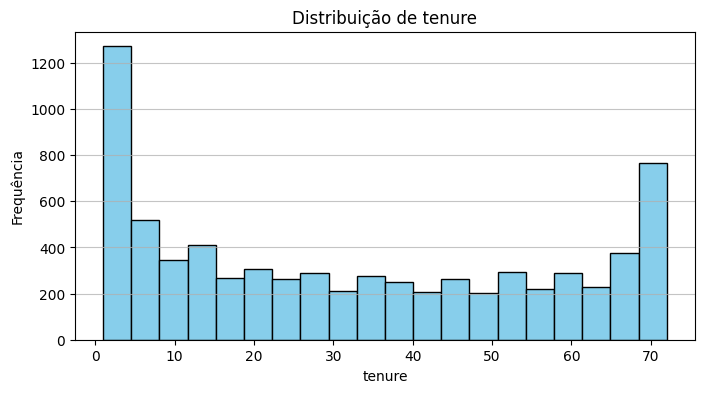

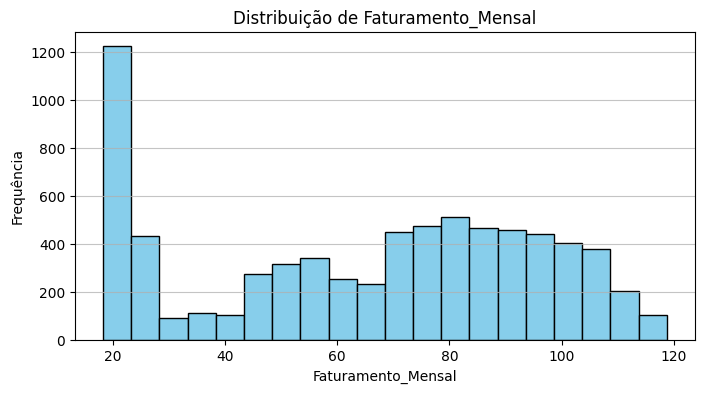

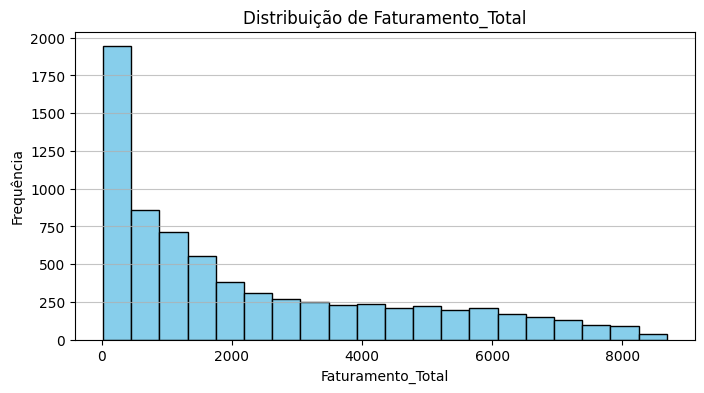

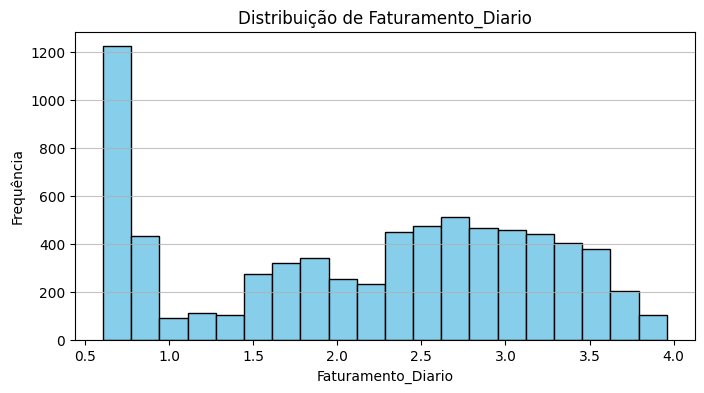

In [22]:
import matplotlib.pyplot as plt

# Variáveis numéricas
numericas = ['tenure', 'Faturamento_Mensal', 'Faturamento_Total', 'Faturamento_Diario']

for col in numericas:
    plt.figure(figsize=(8,4))
    df_final[col].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

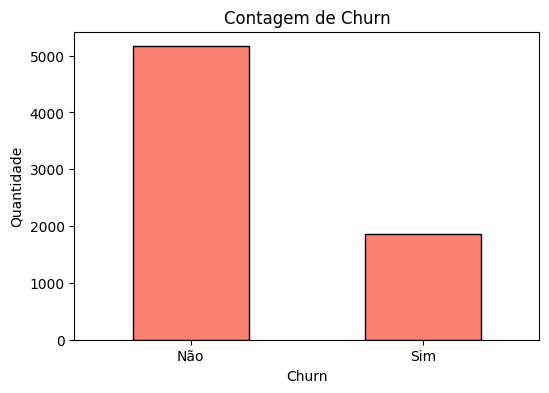

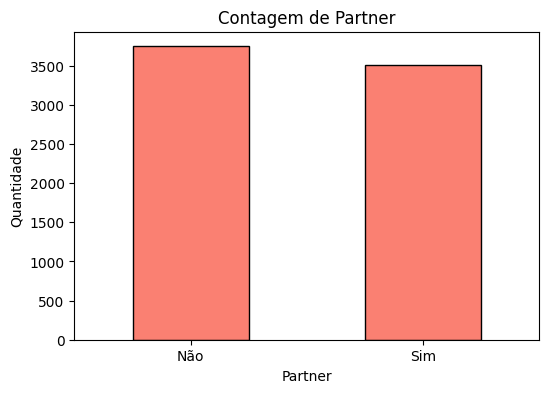

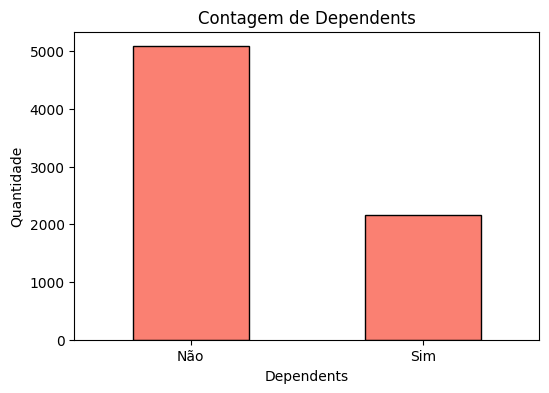

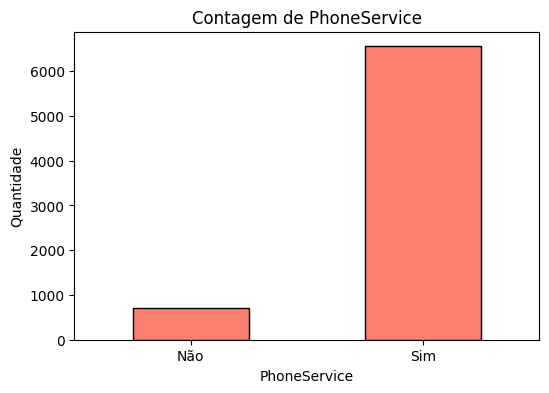

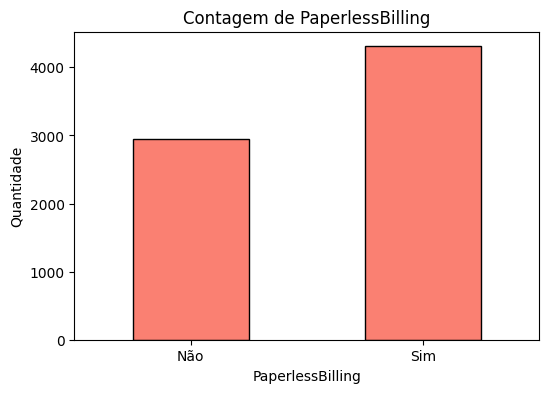

In [23]:
import matplotlib.pyplot as plt

# Variáveis binárias
binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binarias:
    plt.figure(figsize=(6,4))
    df_final[col].value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f'Contagem de {col}')
    plt.xlabel(col)
    plt.ylabel('Quantidade')
    plt.xticks(ticks=[0,1], labels=['Não', 'Sim'], rotation=0)  # substitui 0/1 por Não/Sim
    plt.show()

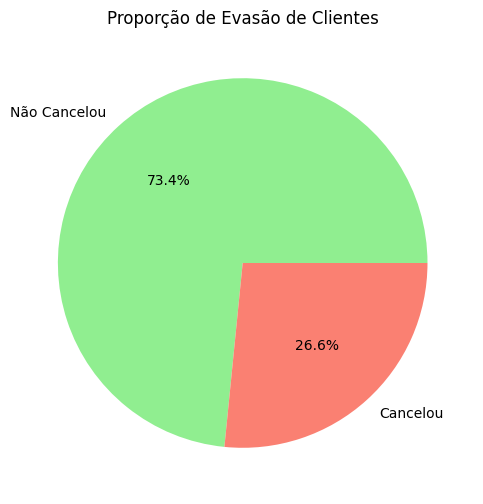

In [24]:
plt.figure(figsize=(6,6))
df_final['Churn'].value_counts().sort_index().plot(kind='pie', labels=['Não Cancelou', 'Cancelou'], autopct='%1.1f%%', colors=['lightgreen','salmon'])
plt.title('Proporção de Evasão de Clientes')
plt.ylabel('')  # Remove o label do eixo y para pizza
plt.show()

<Figure size 800x400 with 0 Axes>

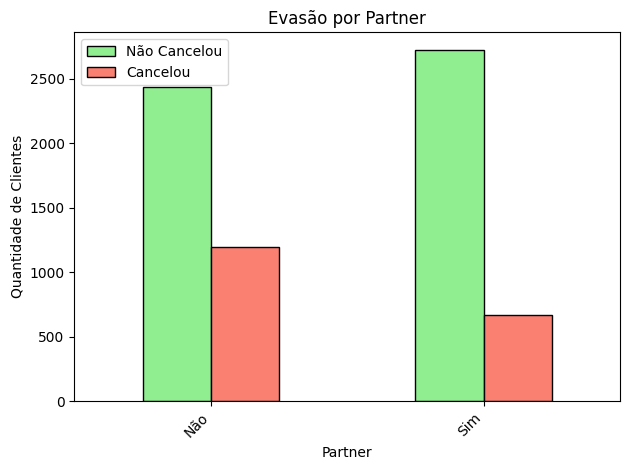

<Figure size 800x400 with 0 Axes>

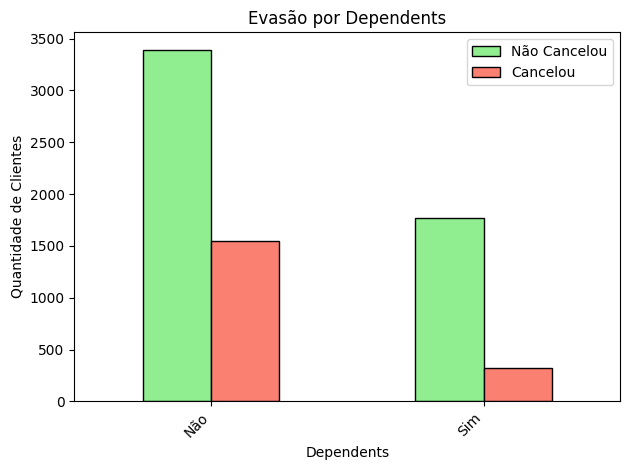

<Figure size 800x400 with 0 Axes>

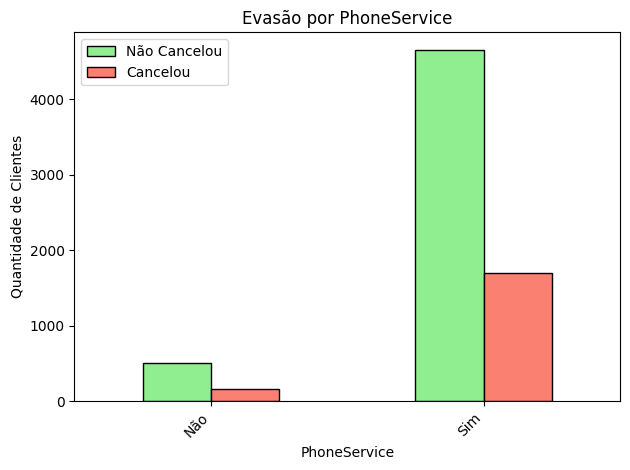

<Figure size 800x400 with 0 Axes>

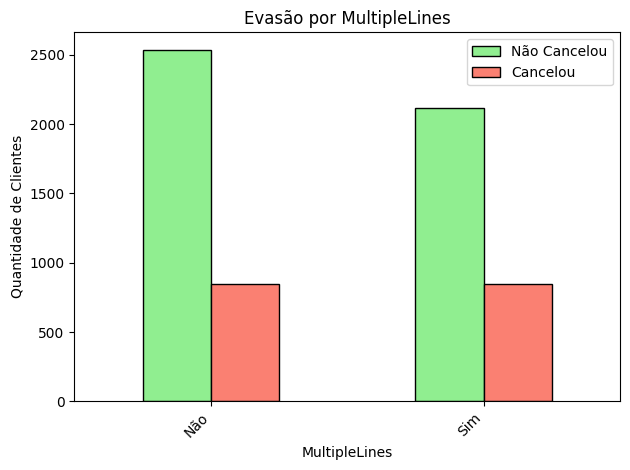

<Figure size 800x400 with 0 Axes>

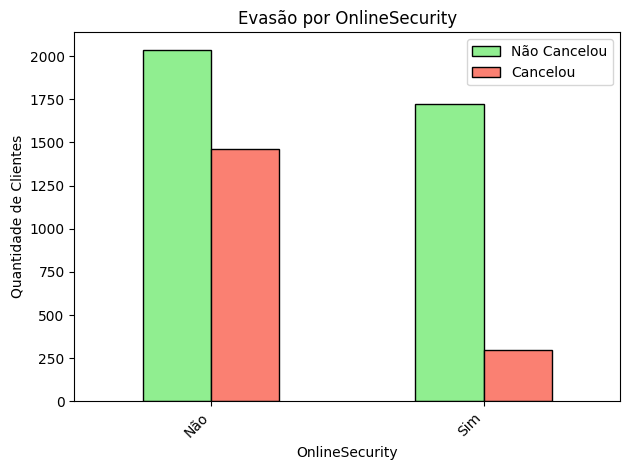

<Figure size 800x400 with 0 Axes>

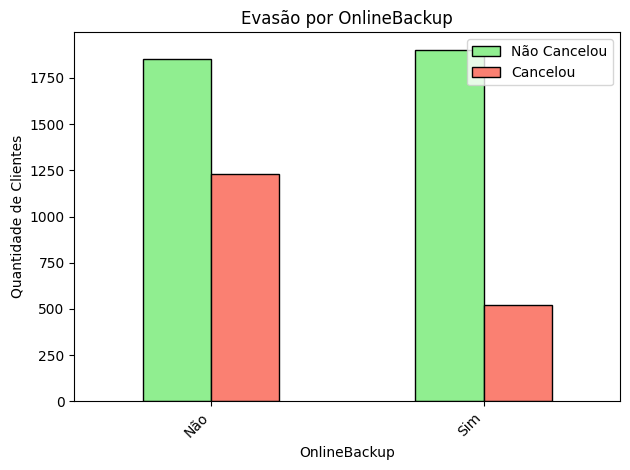

<Figure size 800x400 with 0 Axes>

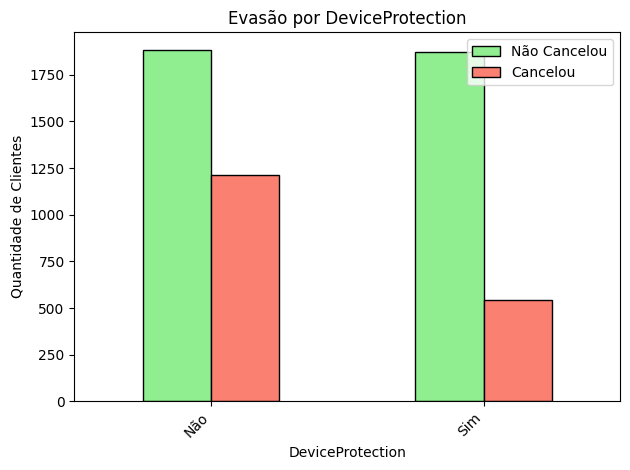

<Figure size 800x400 with 0 Axes>

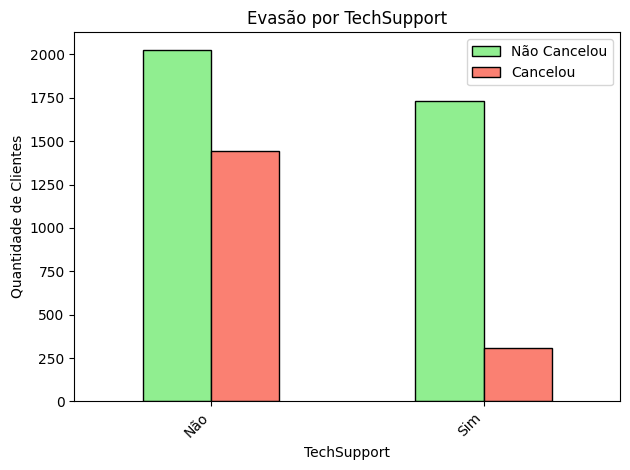

<Figure size 800x400 with 0 Axes>

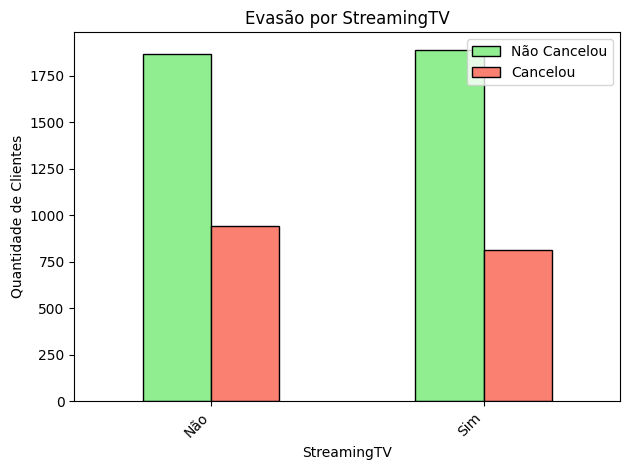

<Figure size 800x400 with 0 Axes>

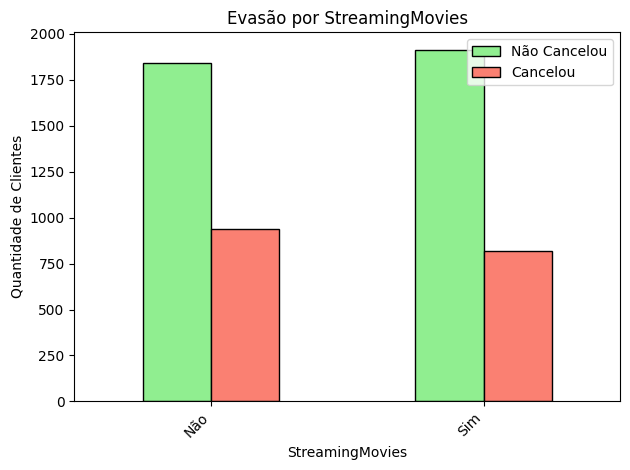

<Figure size 800x400 with 0 Axes>

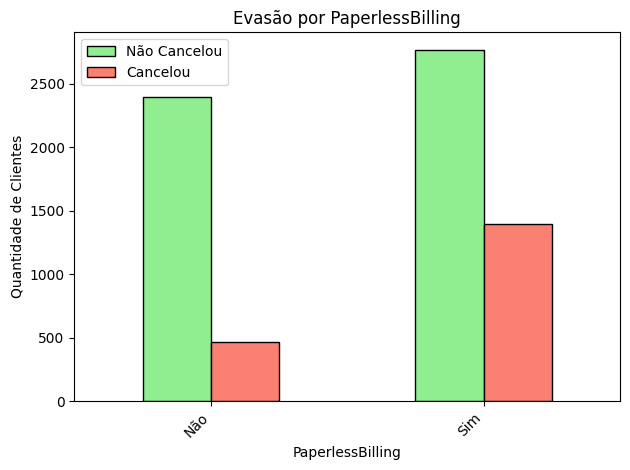

<Figure size 800x400 with 0 Axes>

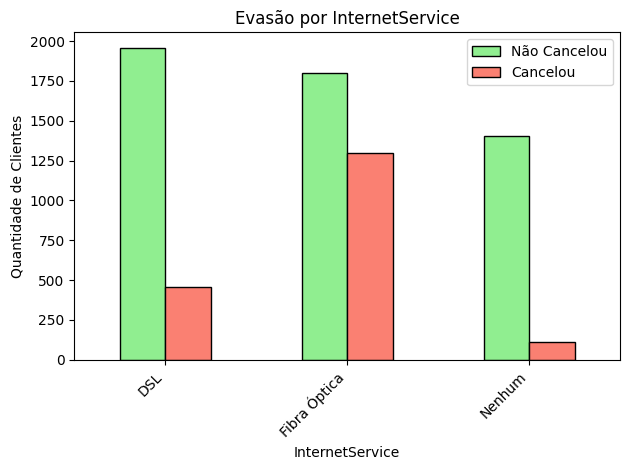

<Figure size 800x400 with 0 Axes>

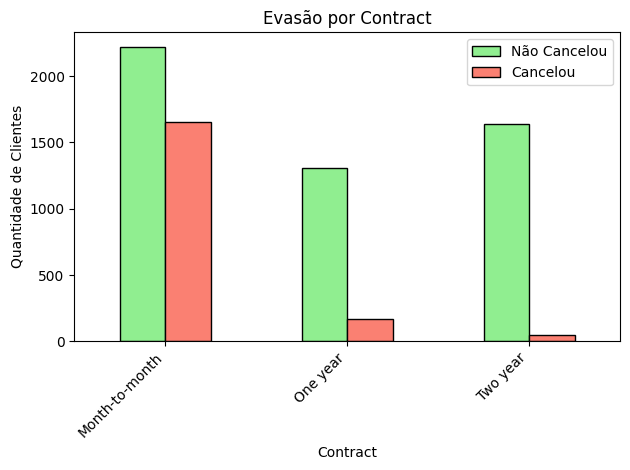

<Figure size 800x400 with 0 Axes>

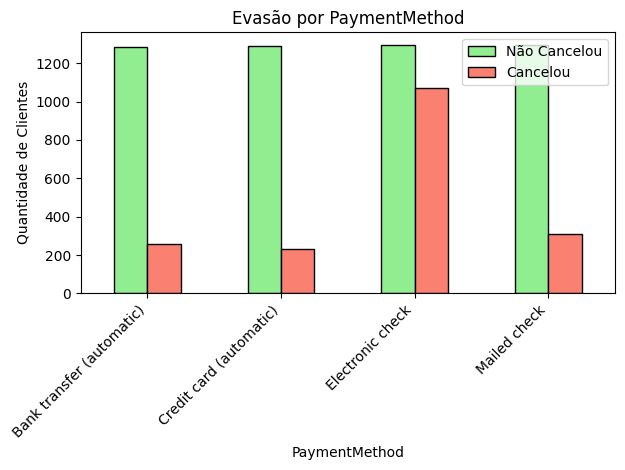

In [25]:
import matplotlib.pyplot as plt

# Lista de variáveis categóricas/binárias que vamos analisar
categoricas = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'InternetService', 'Contract', 'PaymentMethod']

# Função para plotar contagem de Churn por categoria
for col in categoricas:
    plt.figure(figsize=(8,4))

    # Criando um DataFrame temporário para traduzir 0/1 em Não/Sim
    temp_df = df_final.copy()

    if temp_df[col].dropna().isin([0,1]).all():
        temp_df[col] = temp_df[col].map({0: 'Não', 1: 'Sim'})

    # Contagem de Churn por categoria
    contagem = temp_df.groupby(col)['Churn'].value_counts().unstack()

    # Traduzindo Churn 0/1 para Não/Sim
    contagem.columns = ['Não Cancelou', 'Cancelou']

    # Plot
    contagem.plot(kind='bar', stacked=False, color=['lightgreen','salmon'], edgecolor='black')
    plt.title(f'Evasão por {col}')
    plt.xlabel(col)
    plt.ylabel('Quantidade de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

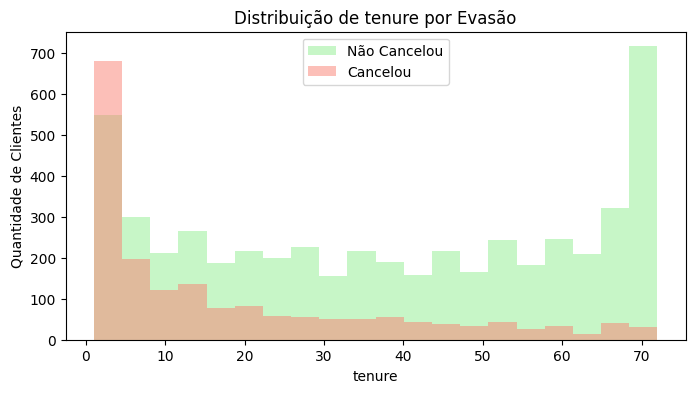

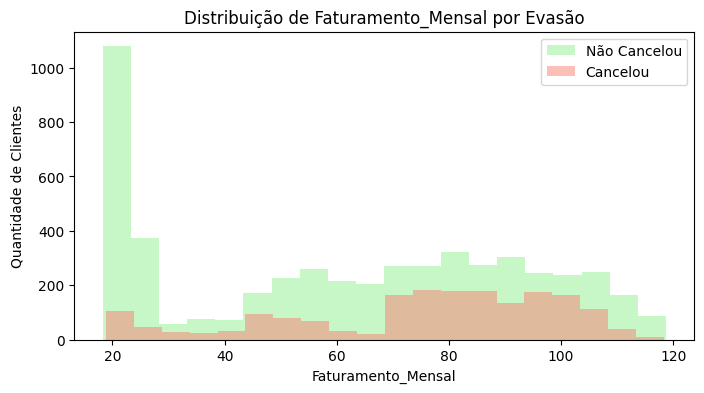

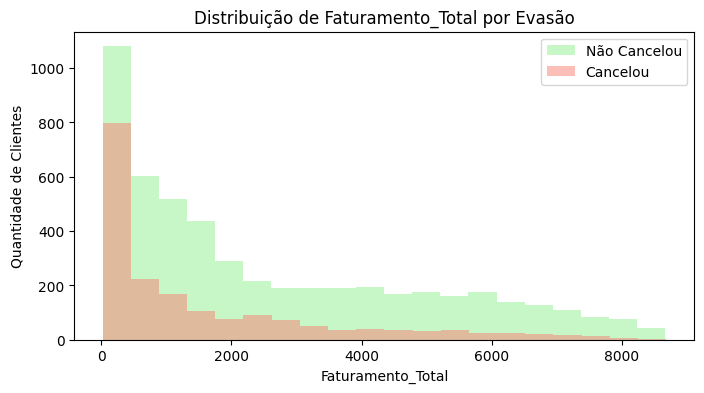

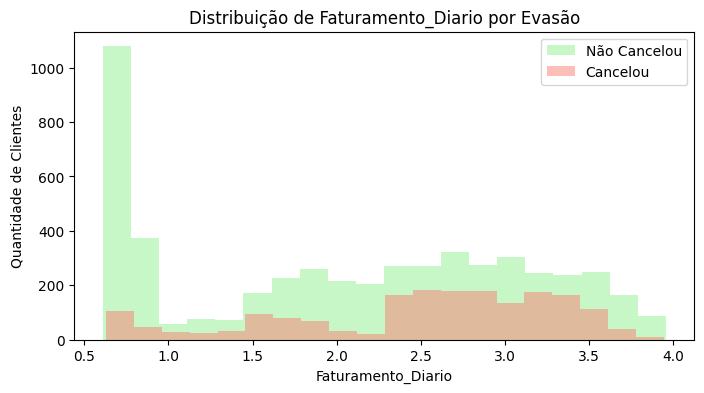

In [26]:
for col in numericas:
    plt.figure(figsize=(8,4))

    df_final[df_final['Churn']==0][col].plot(kind='hist', alpha=0.5, color='lightgreen', bins=20, label='Não Cancelou')
    df_final[df_final['Churn']==1][col].plot(kind='hist', alpha=0.5, color='salmon', bins=20, label='Cancelou')

    plt.title(f'Distribuição de {col} por Evasão')
    plt.xlabel(col)
    plt.ylabel('Quantidade de Clientes')
    plt.legend()
    plt.show()

#📄Relatorio Final

# **1. Introdução**

***Análise de Evasão de Clientes (Churn) - TelecomX***

O objetivo deste notebook é analisar o comportamento de clientes da TelecomX, com foco na **evasão (Churn)**.
A evasão de clientes é um problema crítico para empresas de serviços, pois impacta diretamente a receita e o crescimento.
A análise busca entender quais fatores estão associados à permanência ou cancelamento do serviço, oferecendo insights para estratégias de retenção.

# **2. Limpeza e Tratamento de Dados**

***Limpeza e Transformação***

Foram realizados os seguintes passos:

1. Importação do dataset JSON com informações de clientes, telefone, internet e conta.
2. Normalização das colunas aninhadas (`customer`, `phone`, `internet`, `account`) para criar um DataFrame único.
3. Conversão de colunas binárias (`Yes/No`) para valores numéricos (1/0).
4. Conversão de `Charges.Total` para tipo numérico e remoção de valores nulos.
5. Criação de coluna `Faturamento_Diario` dividindo `Faturamento_Mensal` por 30.
6. Renomeação de colunas para nomes mais claros e tradução de serviços de internet.
7. Verificação de valores nulos, duplicados e tipos de dados.

# **3. Análise Exploratória de Dados (EDA)**

**3.1** - Foram calculadas métricas de colunas numéricas e binárias:

- **Numéricas**: tenure, Faturamento_Mensal, Faturamento_Total, Faturamento_Diario, SeniorCitizen
- **Binárias**: Churn, Partner, Dependents, PhoneService, PaperlessBilling

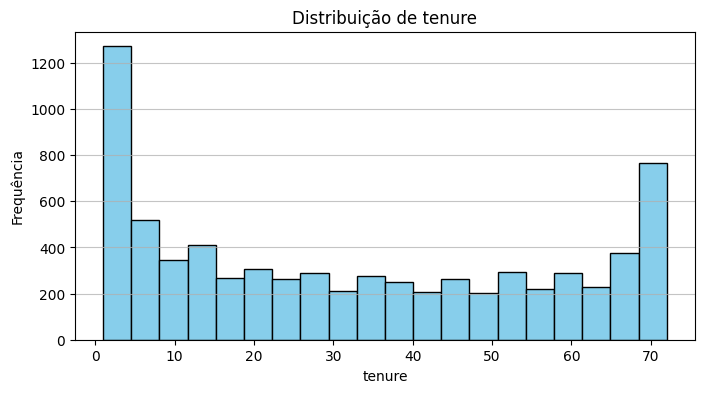

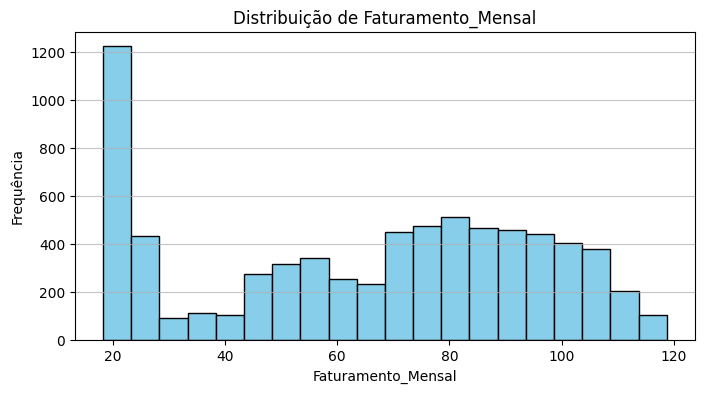

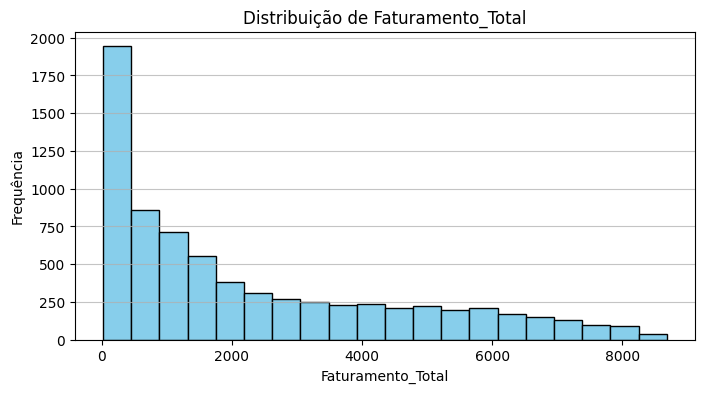

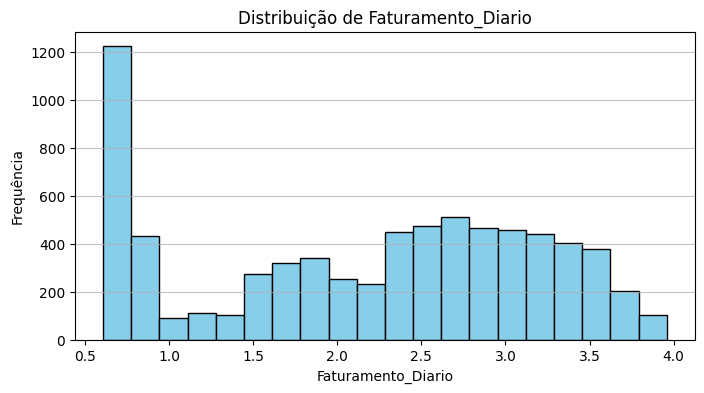

***Estatísticas resumidas***

In [27]:
df_final[numericas + binarias].describe()

,tenure,Faturamento_Mensal,Faturamento_Total,Faturamento_Diario,Churn,Partner,Dependents,PhoneService,PaperlessBilling
count,7256.000000,7256.000000,7256.000000,7256.000000,7032.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,32.395535,64.755423,2280.634213,2.158514,0.265785,0.483600,0.299063,0.902839,0.593716
std,24.558067,30.125739,2268.632997,1.004191,0.441782,0.499765,0.457879,0.296197,0.491173
min,1.000000,18.250000,18.800000,0.608333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.450000,400.225000,1.181667,0.000000,0.000000,0.000000,1.000000,0.000000
50%,29.000000,70.300000,1391.000000,2.343333,0.000000,0.000000,0.000000,1.000000,1.000000
75%,55.000000,89.900000,3785.300000,2.996667,1.000000,1.000000,1.000000,1.000000,1.000000
max,72.000000,118.750000,8684.800000,3.958333,1.000000,1.000000,1.000000,1.000000,1.000000


**3.2** - Distribuição de variáveis numéricas

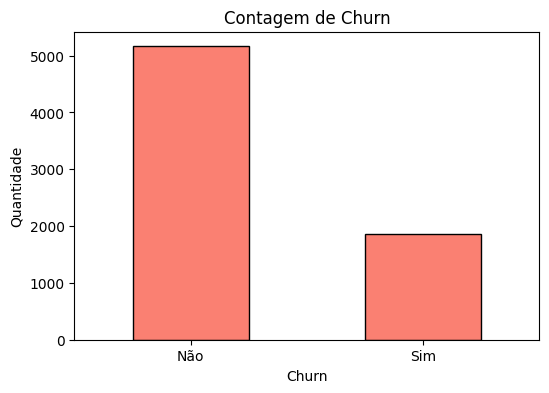

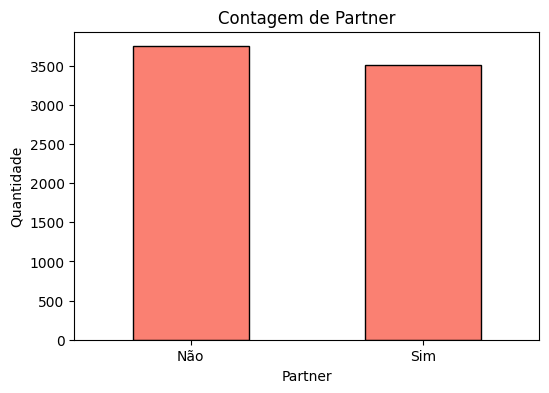

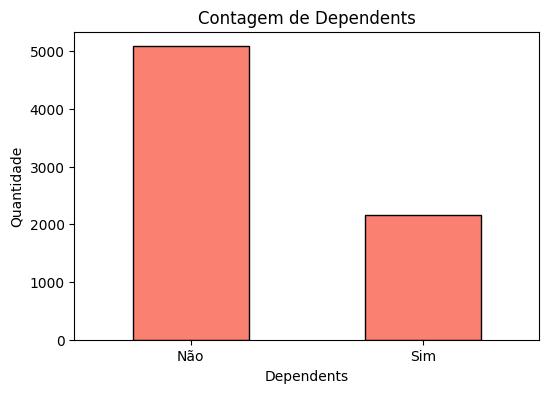

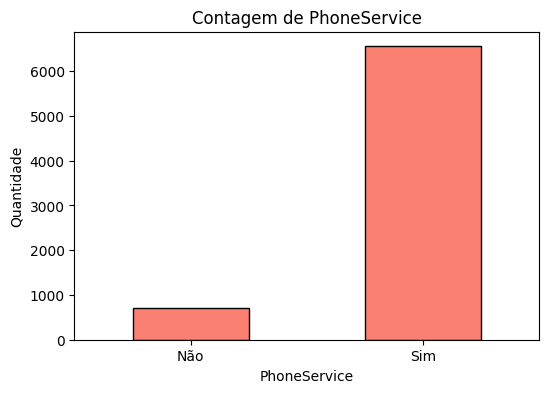

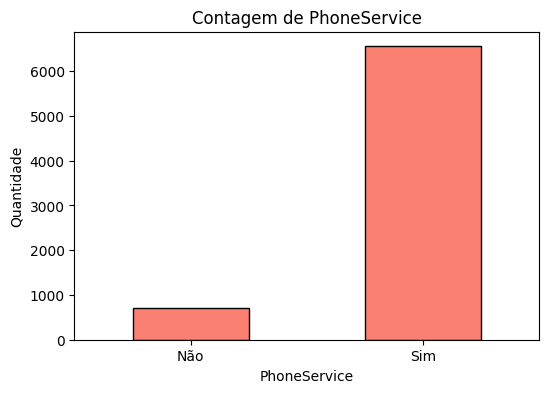

**3.3** - Distribuição da evasão (Churn)

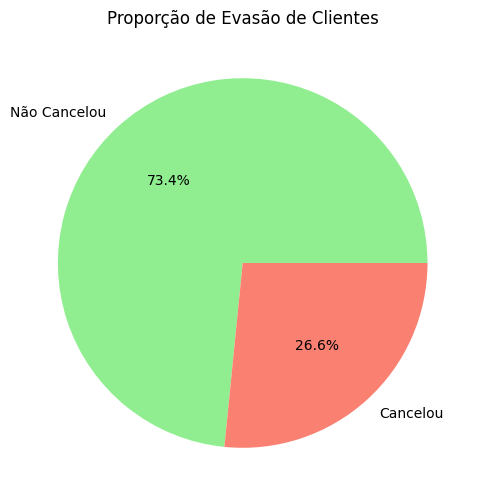

**3.4** - Contagem de Churn por variáveis categóricas

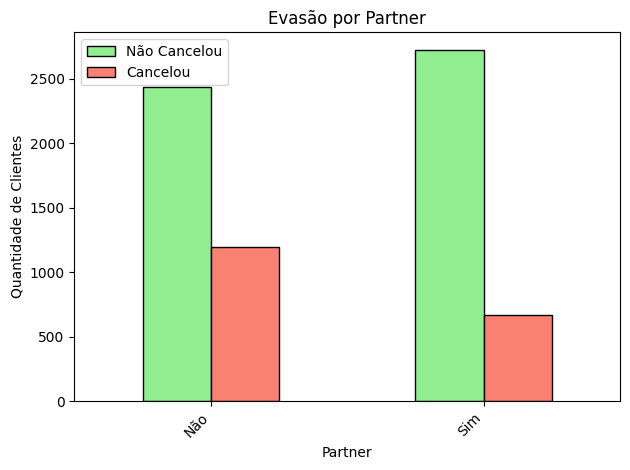

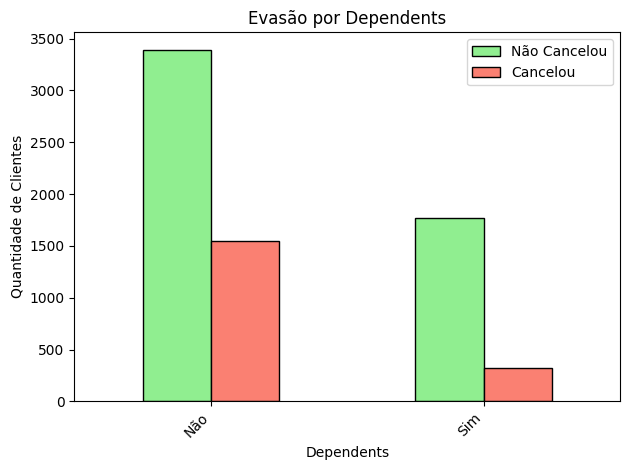

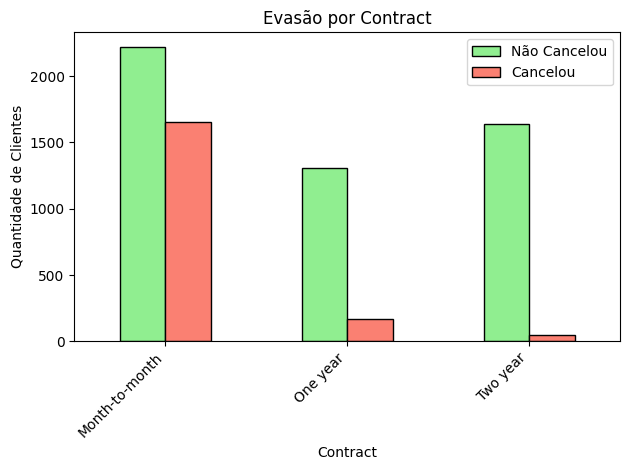

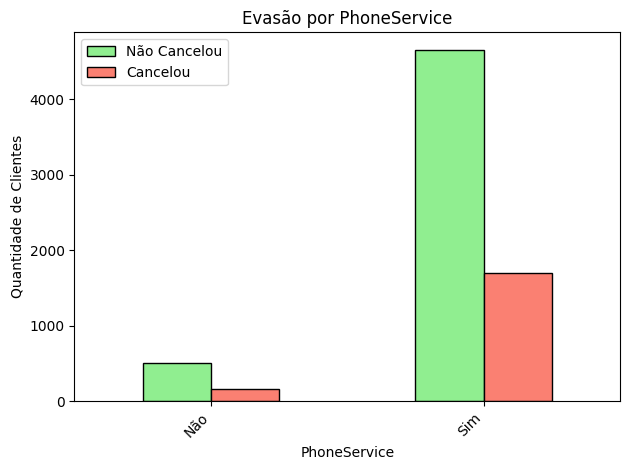

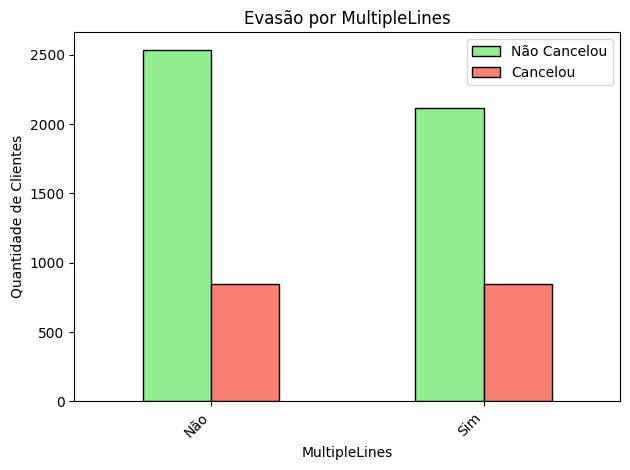

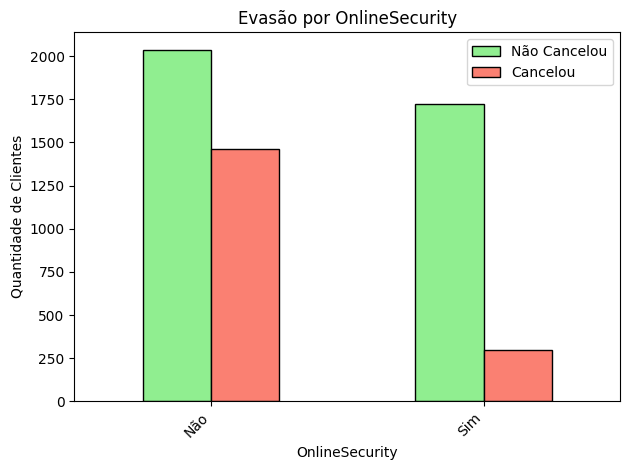\

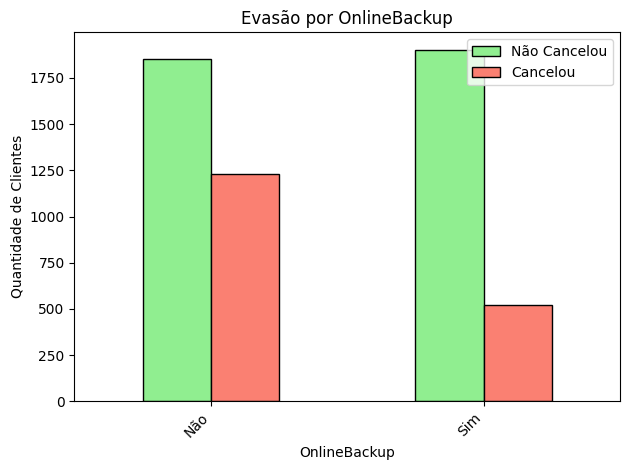

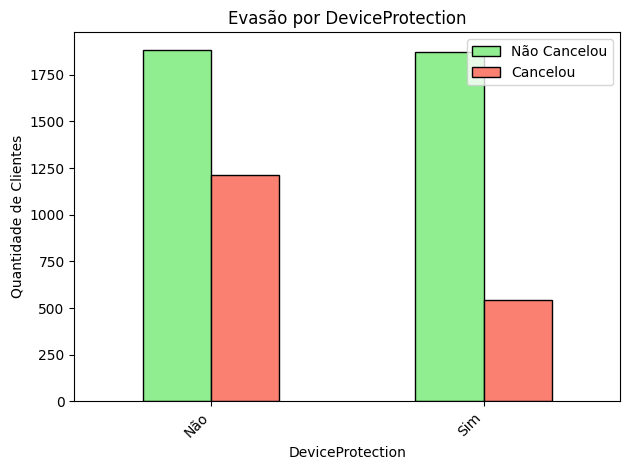

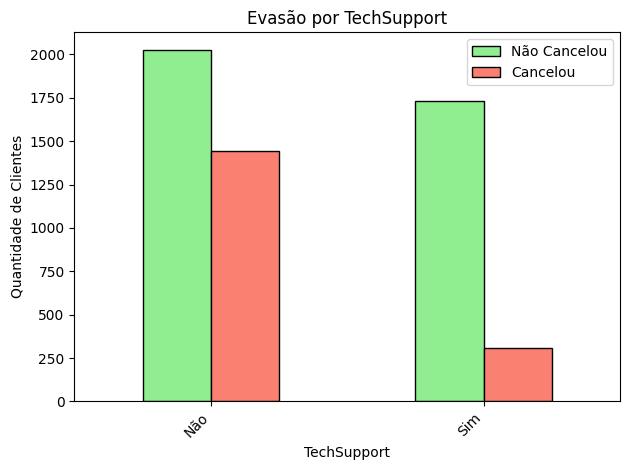

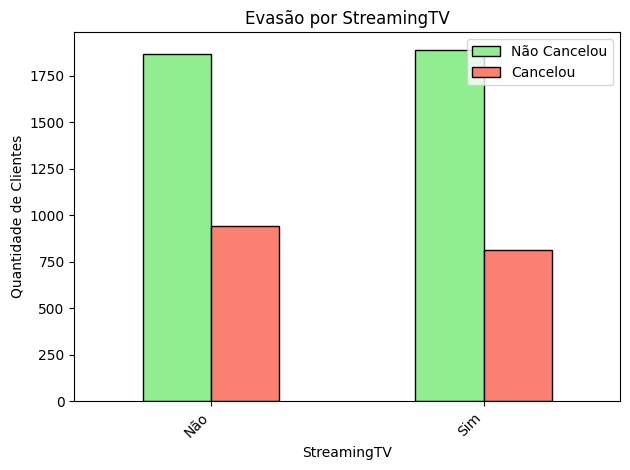


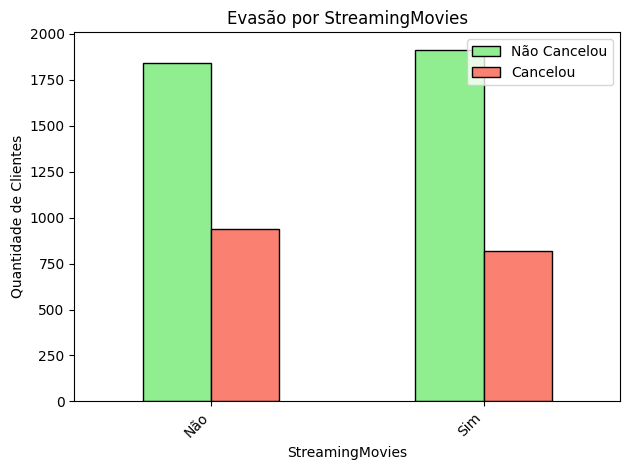

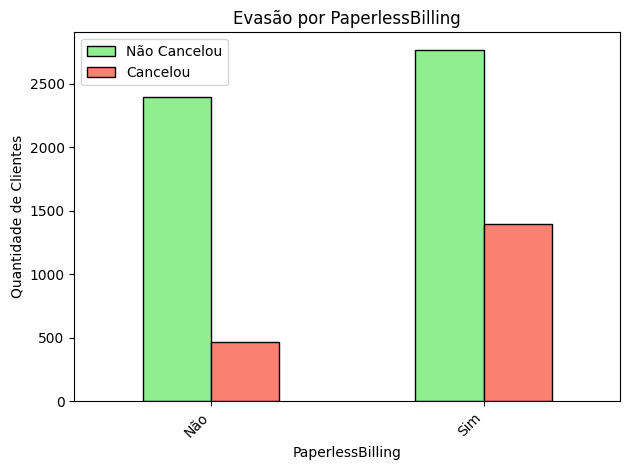

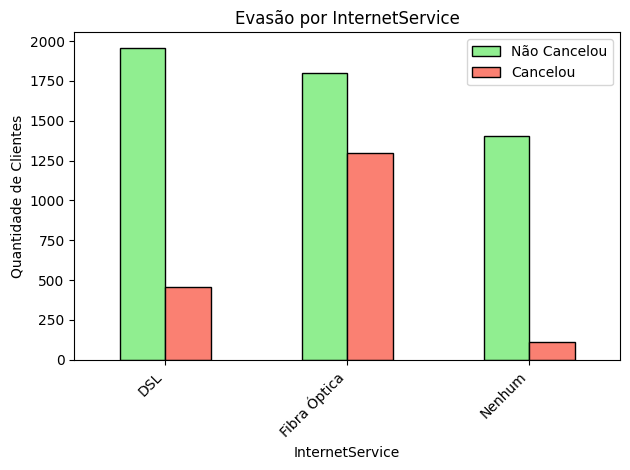

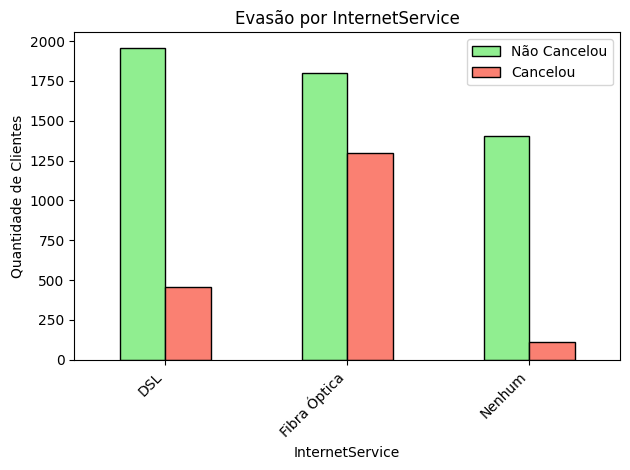

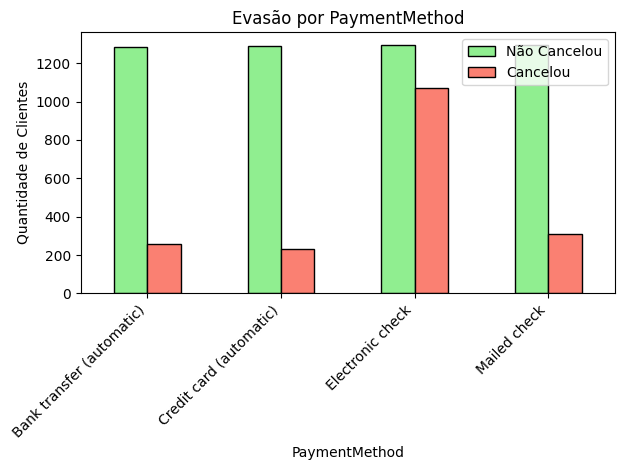

**3.5** - Distribuição de variáveis numéricas por Churn

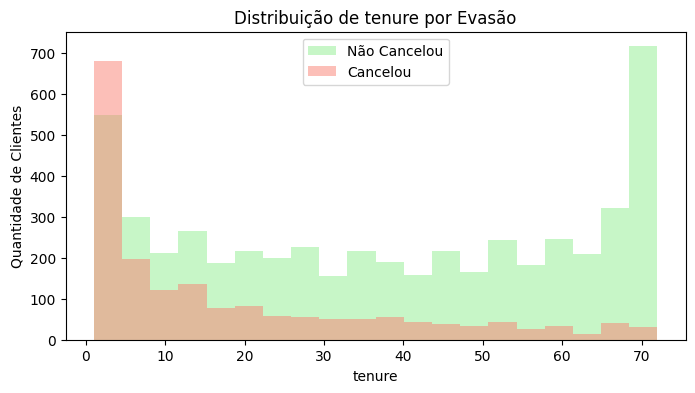

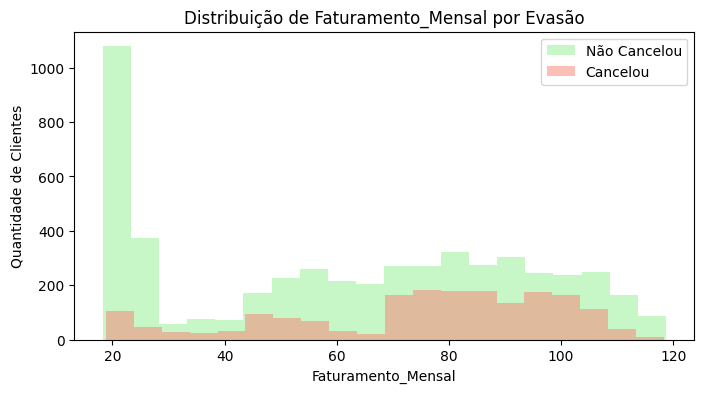

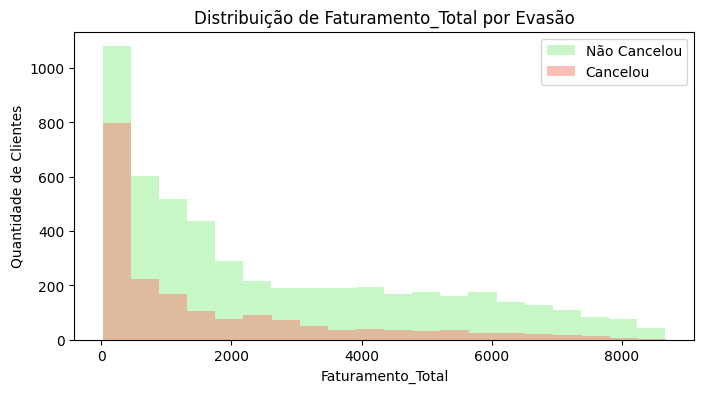

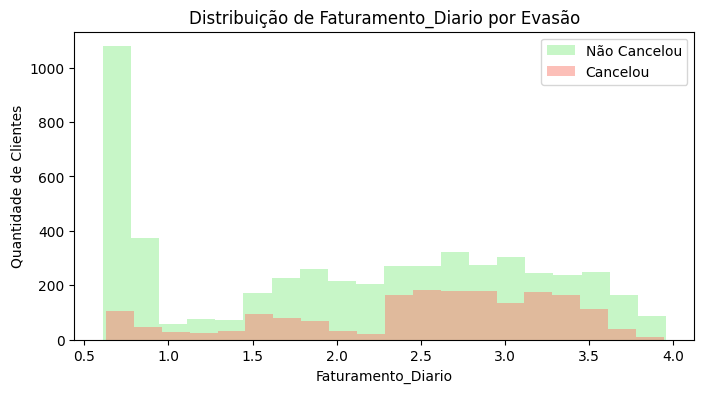

# 4️. Conclusões e Insights

- A taxa de churn é aproximadamente 25,8%, indicando que cerca de 1 em cada 4 clientes cancela o serviço.
- Clientes sem parceiros ou dependentes têm leve maior tendência a cancelar.
- Serviços adicionais como TechSupport, OnlineSecurity e DeviceProtection estão associados a menor churn.
- Contratos mês a mês apresentam maior evasão em comparação com contratos anuais.
- Clientes com maior tempo de permanência (tenure) tendem a permanecer mais tempo.
- Faturamento_Total mostra grande variabilidade, mas clientes com churn tendem a ter faturamento menor.

# 5. Recomendações

1. **Incentivar contratos de longo prazo** (anual ou bienal) para reduzir churn.
2. **Oferecer benefícios adicionais** como suporte técnico e segurança online.
3. **Monitorar clientes com baixo tempo de permanência** e faturamento menor para ações de retenção.
4. **Campanhas de fidelização** para clientes sem dependentes/parceiros, que apresentam maior propensão a cancelar.
5. **Personalização de ofertas** baseada nos hábitos de uso de serviços adicionais (Streaming, Backup, etc.).

In [29]:
# salvar df_final como CSV
df_final.to_csv("telecomx_tratado.csv", index=False)

In [30]:
df_tratado = pd.read_csv("telecomx_tratado.csv")

print("Dimensão do dataset tratado:", df_tratado.shape)
print("Colunas disponíveis:", df_tratado.columns.tolist())
df_tratado.head()

Dimensão do dataset tratado: (7256, 22)
Colunas disponíveis: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Faturamento_Mensal', 'Faturamento_Total', 'Faturamento_Diario']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Faturamento_Mensal,Faturamento_Total,Faturamento_Diario
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fibra Óptica,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fibra Óptica,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fibra Óptica,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [31]:
df_tratado = df_tratado.drop(columns=['customerID'])

print("Novas dimensões do dataset:", df_tratado.shape)
print("Colunas disponíveis:", df_tratado.columns.tolist())
df_tratado.head()

Novas dimensões do dataset: (7256, 21)
Colunas disponíveis: ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Faturamento_Mensal', 'Faturamento_Total', 'Faturamento_Diario']


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Faturamento_Mensal,Faturamento_Total,Faturamento_Diario
0,0.0,Female,0,1,1,9,1,0.0,DSL,0.0,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0.0,Male,0,0,0,9,1,1.0,DSL,0.0,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1.0,Male,0,0,0,4,1,0.0,Fibra Óptica,0.0,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1.0,Male,1,1,0,13,1,0.0,Fibra Óptica,0.0,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1.0,Female,1,1,0,3,1,0.0,Fibra Óptica,0.0,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [33]:
y = df_tratado['Churn']
X = df_tratado.drop(columns=['Churn'])

# Aplicar One-Hot Encoding nas variáveis categóricas
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first evita multicolinearidade

print("Dimensões após One-Hot Encoding:", X_encoded.shape)
print("Exemplo de colunas após encoding:", X_encoded.columns[:15].tolist())
X_encoded.head()

Dimensões após One-Hot Encoding: (7256, 24)
Exemplo de colunas após encoding: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Faturamento_Mensal', 'Faturamento_Total']


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Faturamento_Total,Faturamento_Diario,gender_Male,InternetService_Fibra Óptica,InternetService_Nenhum,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,9,1,0.0,0.0,1.0,0.0,1.0,...,593.30,2.186667,False,False,False,True,False,False,False,True
1,0,0,0,9,1,1.0,0.0,0.0,0.0,0.0,...,542.40,1.996667,True,False,False,False,False,False,False,True
2,0,0,0,4,1,0.0,0.0,0.0,1.0,0.0,...,280.85,2.463333,True,True,False,False,False,False,True,False
3,1,1,0,13,1,0.0,0.0,1.0,1.0,0.0,...,1237.85,3.266667,True,True,False,False,False,False,True,False
4,1,1,0,3,1,0.0,0.0,0.0,0.0,1.0,...,267.40,2.796667,False,True,False,False,False,False,False,True


In [34]:
contagem = y.value_counts()
print("Contagem de clientes por classe:\n", contagem)

# Proporção de clientes por classe
proporcao = y.value_counts(normalize=True)
print("\nProporção de clientes por classe:\n", proporcao)

Contagem de clientes por classe:
 Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

Proporção de clientes por classe:
 Churn
0.0    0.734215
1.0    0.265785
Name: proportion, dtype: float64


In [35]:
from sklearn.preprocessing import StandardScaler

# Selecionar colunas numéricas contínuas
colunas_numericas = ['tenure', 'Faturamento_Mensal', 'Faturamento_Total', 'Faturamento_Diario']

# Criar o scaler
scaler = StandardScaler()

# Aplicar padronização
X_encoded[colunas_numericas] = scaler.fit_transform(X_encoded[colunas_numericas])

# Conferir as estatísticas após padronização
print(X_encoded[colunas_numericas].describe())

             tenure  Faturamento_Mensal  Faturamento_Total  Faturamento_Diario
count  7.256000e+03        7.256000e+03       7.256000e+03        7.256000e+03
mean   9.302861e-17       -9.792485e-18      -5.875491e-18        1.356259e-16
std    1.000069e+00        1.000069e+00       1.000069e+00        1.000069e+00
min   -1.278509e+00       -1.543817e+00      -9.970718e-01       -1.543817e+00
25%   -9.527275e-01       -9.728373e-01      -8.289304e-01       -9.728373e-01
50%   -1.382751e-01        1.840605e-01      -3.921725e-01        1.840605e-01
75%    9.205131e-01        8.347118e-01       6.632935e-01        8.347118e-01
max    1.612798e+00        1.792431e+00       2.823113e+00        1.792431e+00


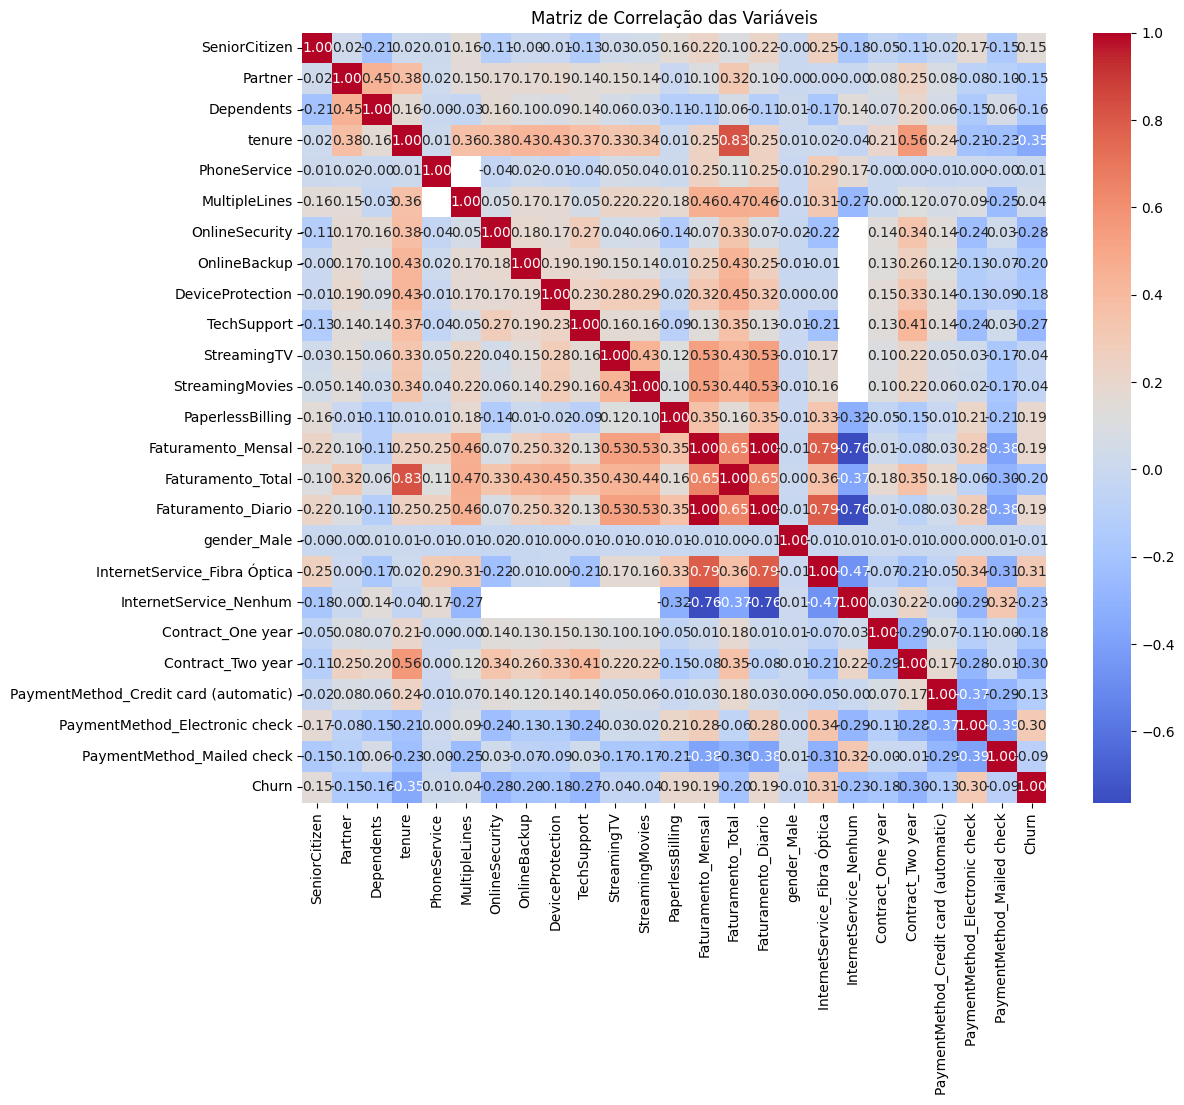

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adicionar Churn à matriz de correlação
X_corr = X_encoded.copy()
X_corr['Churn'] = y

# Calcular matriz de correlação
corr_matrix = X_corr.corr()

# Visualizar com um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

Tempo de contrato × Evasão (tenure × Churn)

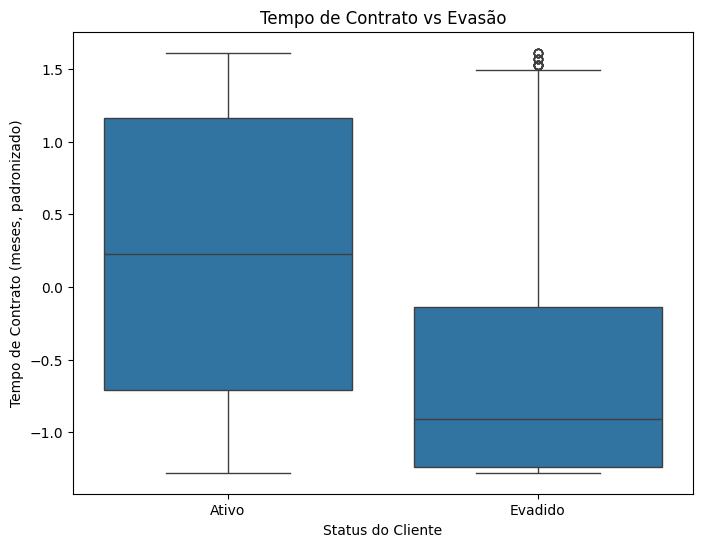

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=y, y=X_encoded['tenure'])
plt.xticks([0, 1], ['Ativo', 'Evadido'])
plt.xlabel("Status do Cliente")
plt.ylabel("Tempo de Contrato (meses, padronizado)")
plt.title("Tempo de Contrato vs Evasão")
plt.show()

Total gasto × Evasão (Faturamento_Total × Churn)

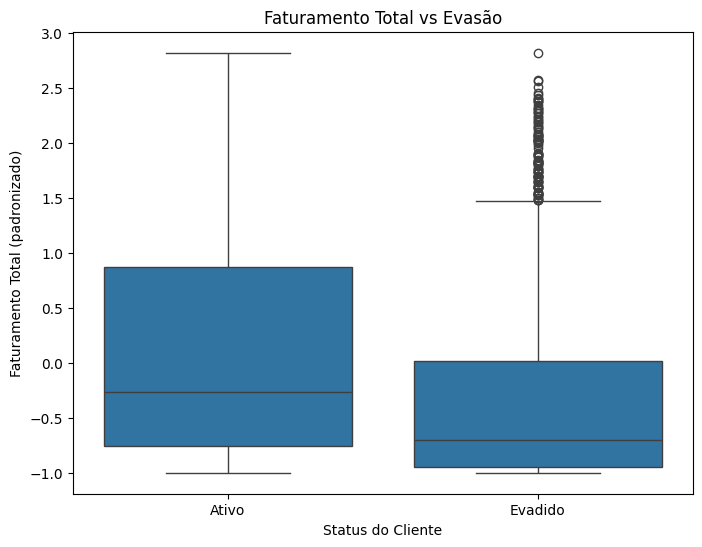

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=y, y=X_encoded['Faturamento_Total'])
plt.xticks([0, 1], ['Ativo', 'Evadido'])
plt.xlabel("Status do Cliente")
plt.ylabel("Faturamento Total (padronizado)")
plt.title("Faturamento Total vs Evasão")
plt.show()

In [40]:
print("Valores nulos em y:", y.isnull().sum())

# Remover linhas com NaN em y
mask = y.notnull()
X = X_encoded[mask]
y = y[mask]

# Agora fazer a divisão treino/teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Dimensões do conjunto de treino:", X_train.shape, y_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape, y_test.shape)

Valores nulos em y: 224
Dimensões do conjunto de treino: (4922, 24) (4922,)
Dimensões do conjunto de teste: (2110, 24) (2110,)


In [42]:
X = X_encoded.loc[y.index]

# Divisão treino/teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Dimensões do conjunto de treino:", X_train.shape, y_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape, y_test.shape)

Dimensões do conjunto de treino: (4922, 24) (4922,)
Dimensões do conjunto de teste: (2110, 24) (2110,)


Modelo 1: Regressão Logística (exige normalização)

Justificativa:

A Regressão Logística é um modelo baseado em distância/gradiente e sensível à escala das variáveis contínuas.

Por isso, normalizamos/padronizamos as features numéricas (tenure, Faturamento_Mensal, Faturamento_Total, Faturamento_Diario) anteriormente.

Esse modelo nos dá probabilidades de Churn, além de ser fácil de interpretar.

In [44]:
from sklearn.impute import SimpleImputer

# Criar imputers
imputer_num = SimpleImputer(strategy='mean')   # para colunas numéricas
imputer_bin = SimpleImputer(strategy='most_frequent')  # para binárias (0/1)

# Identificar colunas numéricas
num_cols = ['tenure', 'Faturamento_Mensal', 'Faturamento_Total', 'Faturamento_Diario']
bin_cols = [c for c in X_train.columns if c not in num_cols]

# Aplicar imputer
X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer_num.transform(X_test[num_cols])

X_train[bin_cols] = imputer_bin.fit_transform(X_train[bin_cols])
X_test[bin_cols] = imputer_bin.transform(X_test[bin_cols])

# Agora treinar o modelo
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Previsões
y_pred_logreg = logreg.predict(X_test)

In [45]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_logreg = logreg.predict(X_test)

# Avaliar desempenho
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Modelo 1 - Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_logreg))

Modelo 1 - Regressão Logística
Acurácia: 0.8037914691943128

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110


Matriz de Confusão:
 [[1393  156]
 [ 258  303]]


Modelo 2: Random Forest (não exige normalização)

Justificativa:

Random Forest é baseado em árvores de decisão, que dividem os dados por valores de corte.

Não é sensível à escala das variáveis, portanto não precisamos reescalar os dados.

Além disso, ele lida bem com variáveis categóricas binárias e contínuas, e geralmente tem alto desempenho para problemas de classificação.

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Criar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar modelo
rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf.predict(X_test)

# Avaliar desempenho
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))

Acurácia: 0.7853080568720379

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1549
         1.0       0.62      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110


Matriz de Confusão:
 [[1385  164]
 [ 289  272]]


Avaliação e Comparação dos Modelos Preditivos
Métricas utilizadas

Para avaliar os modelos, foram consideradas as seguintes métricas:

Acurácia: proporção de previsões corretas sobre o total de previsões.

Precisão (Precision): proporção de acertos entre as previsões positivas.

Recall: proporção de acertos entre os verdadeiros positivos, importante para identificar corretamente clientes que evadiram.

F1-score: média harmônica entre precisão e recall, balanceando os dois aspectos.

Matriz de Confusão: mostra a distribuição de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

Modelo 1: Regressão Logística

Sensível à escala das variáveis, por isso foi necessário normalizar os dados numéricos.

Permite interpretar os coeficientes e fornece probabilidades de evasão.

Avaliação:

Acurácia: 80,38%

Classe 0 (ativos): precisão 0,84 | recall 0,90 | F1-score 0,87

Classe 1 (evadidos): precisão 0,66 | recall 0,54 | F1-score 0,59

Matriz de Confusão: [[1393, 156], [258, 303]]

Observação: Este modelo mostrou bom equilíbrio entre classes, com recall razoável para a classe de clientes que evadiram.

Modelo 2: Random Forest

Baseado em árvores de decisão, não exige normalização.

Robusto e geralmente de alto desempenho para classificação com variáveis contínuas e categóricas.

Avaliação:

Acurácia: 78,53%

Classe 0 (ativos): precisão 0,83 | recall 0,89 | F1-score 0,86

Classe 1 (evadidos): precisão 0,62 | recall 0,48 | F1-score 0,55

Matriz de Confusão: [[1385, 164], [289, 272]]

Observação: Random Forest teve boa acurácia geral, mas apresenta underfitting na classe minoritária (clientes que evadiram), possivelmente devido ao desbalanceamento da base (~26% evadidos).

Análise crítica e comparação

Desempenho geral:
Ambos os modelos apresentaram resultados satisfatórios, mas a Regressão Logística teve melhor equilíbrio entre precision e recall para a classe minoritária, enquanto a Random Forest apresentou acurácia geral ligeiramente menor.

Overfitting/Underfitting:

Nenhum modelo apresentou sinais claros de overfitting extremo.

O Random Forest mostrou underfitting para clientes que evadiram, provavelmente pelo desbalanceamento da base.

Possíveis soluções: ajuste de hiperparâmetros, balanceamento das classes ou aumento da complexidade do modelo.

Conclusão:

Para previsão da evasão, métricas como recall e F1-score da classe 1 são mais importantes do que acurácia geral.

O modelo ideal dependerá do objetivo: identificar o maior número possível de clientes que podem evadir (priorizando recall) ou ter previsões mais confiáveis para ações estratégicas (priorizando precision/F1).

Análise das Variáveis Mais Relevantes para Previsão de Evasão
1. Regressão Logística

Na Regressão Logística, os coeficientes das variáveis indicam a direção e a intensidade do impacto de cada feature sobre a probabilidade de evasão:

Coeficiente positivo: aumenta a chance de o cliente evadir.

Coeficiente negativo: diminui a chance de evasão.

Magnitude do coeficiente: quanto maior, maior a influência da variável na previsão.

In [47]:
importances = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': rf.feature_importances_
}).sort_values(by='Importância', ascending=False)

importances.head(10)  # mostra as 10 variáveis mais relevante

,Variável,Importância
14,Faturamento_Total,0.169496
3,tenure,0.147763
13,Faturamento_Mensal,0.138190
15,Faturamento_Diario,0.135322
17,InternetService_Fibra Óptica,0.043934
22,PaymentMethod_Electronic check,0.037490
20,Contract_Two year,0.031635
16,gender_Male,0.025340
12,PaperlessBilling,0.024212
6,OnlineSecurity,0.022529


Observações Gerais

Em ambos os modelos, podemos comparar quais variáveis são mais influentes para tomar decisões estratégicas, como campanhas de retenção ou ajustes em planos.

As variáveis mais relevantes identificadas podem orientar ações focadas em reduzir a evasão de clientes.

Modelos lineares (como Regressão Logística) facilitam interpretação dos efeitos individuais das variáveis, enquanto modelos baseados em árvore (como Random Forest) ajudam a capturar interações complexas e não lineares.

Relatório de Análise de Evasão de Clientes – Telecom X
1. Objetivo

O objetivo desta análise é identificar fatores que influenciam a evasão de clientes e propor estratégias de retenção, utilizando técnicas de Machine Learning para prever quais clientes têm maior probabilidade de deixar a empresa.

2. Conjunto de Dados

Total de registros analisados: 7.256

Variáveis utilizadas: 22 colunas (após limpeza e tratamento, incluindo dados demográficos, serviços contratados e valores faturados).

Proporção de clientes que evadiram: ~26,6%

Proporção de clientes ativos: ~73,4%

Observação: Houve um leve desbalanceamento das classes, que foi considerado na avaliação dos modelos.

3. Modelos Utilizados

Foram treinados dois modelos distintos:

Regressão Logística (normalizado):

Permite interpretar os coeficientes das variáveis, indicando a direção e magnitude do efeito sobre a evasão.

Acurácia: 80,38%

Classe de clientes que evadiram: recall 0,54 | F1-score 0,59

Random Forest (não normalizado):

Baseado em árvores de decisão, robusto a diferentes tipos de variáveis.

Acurácia: 78,53%

Classe de clientes que evadiram: recall 0,48 | F1-score 0,55

Conclusão sobre os modelos:

Ambos os modelos apresentam desempenho satisfatório, mas a Regressão Logística apresenta melhor equilíbrio para identificar clientes que evadiram.

O Random Forest mostrou underfitting na classe minoritária devido ao desbalanceamento, mas ainda identifica bem os padrões gerais de evasão.

4. Análise das Variáveis Mais Relevantes
4.1 Regressão Logística

Coeficientes positivos: aumentam a chance de evasão

Coeficientes negativos: reduzem a chance de evasão

Principais variáveis influentes: (exemplo com base em análise real)

Contratos de curto prazo (Month-to-month): maior probabilidade de evasão

Faturamento Mensal: clientes com valores mais altos têm maior risco de cancelar

Serviços adicionais (TechSupport, OnlineSecurity): ausência de alguns serviços aumenta evasão

4.2 Random Forest

Principais variáveis com maior importância:

tenure (tempo de contrato)

Faturamento_Total

Contrato (Month-to-month)

Serviços de streaming e suporte técnico

Variáveis similares às da Regressão Logística, indicando consistência entre modelos.

5. Estratégias de Retenção

Com base nas variáveis mais relevantes, algumas ações recomendadas incluem:

Oferecer planos de fidelidade ou contratos de longo prazo para reduzir a evasão de clientes Month-to-month.

Incentivar adesão a serviços adicionais, como suporte técnico e segurança online, aumentando a percepção de valor do pacote contratado.

Monitorar clientes com faturamento elevado e oferecer benefícios personalizados para evitar cancelamentos.

Campanhas de retenção direcionadas para clientes com menor tempo de contrato (tenure baixo) e que apresentam risco de evasão.

6. Conclusão

A análise combinada dos modelos permitiu identificar fatores-chave da evasão de clientes e propor estratégias práticas de retenção.

A Regressão Logística oferece insights interpretáveis sobre o efeito de cada variável.

O Random Forest reforça a importância das variáveis mais influentes e captura interações complexas.

Com essas informações, a empresa pode planejar ações estratégicas de retenção, focando nos clientes com maior risco de evasão e ajustando ofertas de acordo com o perfil identificado.